In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def sameval_cols(df):
    """
    Display columns if all values in the column are the same
    """
    nunique = df.nunique()
    cols_to_drop = nunique[nunique == 1].index
    print(cols_to_drop)
    return

def drop_sameval_cols(df):
    """
    Remove columns if all values in the column are the same
    """
    nunique = df.nunique()
    cols_to_drop = nunique[nunique == 1].index
    df.drop(cols_to_drop, axis=1, inplace=True)
    return df

# IFF Data

## Read in data processed in Sherlock_IFSurface_DataClean.ipynb

In [3]:
iff_head = pd.read_csv('Sherlock_data/IFF_Header.csv')
iff_trk = pd.read_csv('Sherlock_data/IFF_TrackPt.csv')
iff_flt = pd.read_csv('Sherlock_data/IFF_Flight.csv')
print(iff_head.shape, iff_trk.shape, iff_flt.shape)

(28142, 12) (10169040, 17) (188111, 12)


In [4]:
print("IFF_Header: ", iff_head.columns, '\nIFF_Track: ', iff_trk.columns, '\nIFF_Flight: ', iff_flt.columns)

IFF_Header:  Index(['recTime', 'fltKey', 'bcnCode', 'source', 'AcId', 'acType', 'Orig',
       'Dest', 'OpsType', 'estOrig', 'estDest', 'modeSCode'],
      dtype='object') 
IFF_Track:  Index(['recTime', 'fltKey', 'bcnCode', 'AcId', 'coord1', 'coord2', 'alt',
       'significance', 'coord1Accur', 'coord2Accur', 'groundSpeed', 'course',
       'rateOfClimb', 'scratchPad', 'airportCode', 'trackNumber', 'modeSCode'],
      dtype='object') 
IFF_Flight:  Index(['recTime', 'fltKey', 'bcnCode', 'source', 'AcId', 'acType', 'perfCat',
       'equipList', 'scratchPad1', 'scratchPad2', 'trackNumber', 'modeSCode'],
      dtype='object')


## Merge Interesting Data
1. Filter out unnecessary data in IFF datasets (Filter out unknown ModeSCode, keep only OpsType = 'A' and keep only records with airline call sign)
2. Append perfCat from Flight Record data to Header data
3. Merge all IFF data based on ModeSCode, hexadecimal identification of aircrafts

### 1. Filter out unnecessary data in IFF
#### 1a. Discard all data that does not have a known modeSCode, hexadecimal aircraft identifier/address

In [5]:
def rm_null_modeSCode(df):
    """
    Remove NaN in modeSCode column
    """
    if 'modeSCode' in df.columns and df['modeSCode'].isnull().any():
        return df[df['modeSCode'].notna()]

In [6]:
fil_iff_hd = rm_null_modeSCode(iff_head)
fil_iff_tr = rm_null_modeSCode(iff_trk)
fil_iff_fl = rm_null_modeSCode(iff_flt)
print(iff_head.shape, fil_iff_hd.shape, iff_trk.shape, fil_iff_tr.shape, iff_flt.shape, fil_iff_fl.shape)

(28142, 12) (24635, 12) (10169040, 17) (9766293, 17) (188111, 12) (175170, 12)


#### 1b. Only consider Operation Type that is Arrival (A)

In [7]:
ops_iff_hd = fil_iff_hd.loc[iff_head['OpsType'] == 'A']
print(ops_iff_hd.shape)

(7628, 12)


#### 1c. Filter out acId such that only call signs with airline in front are kept

In [8]:
ops_iff_hd['AcId'].dtype

dtype('O')

In [9]:
fil_iff_hd = ops_iff_hd[ops_iff_hd['AcId'].str.contains('[A-Za-z]')]
print(fil_iff_hd.shape)

(7624, 12)


### 2. Append performance category information from flight record data to header data as it is the only interesing column from Flight Record dataset

In [10]:
perfCat = {}
for msc in fil_iff_hd['modeSCode'].unique().tolist():
    if msc in fil_iff_fl['modeSCode'].unique().tolist():
        perfCat[msc] = fil_iff_fl.loc[fil_iff_fl['modeSCode'] == msc]['perfCat'].iloc[0]
    else:
        perfCat[msc] = np.nan
print(perfCat)

{'a784d5': 'J', 'aa7e7b': 'J', 'a1a546': 'J', 'adcd6d': 'J', 'a6b1a3': 'J', 'a88d10': 'J', 'ab627c': 'J', 'a6cff8': 'J', 'a1f5ff': 'J', 'a32368': 'J', 'acce3c': 'J', 'ac07b8': 'J', 'a76f68': 'J', 'a51968': 'J', 'aa77f0': 'J', 'a7888c': 'J', 'a82a06': 'J', 'a96b14': 'J', 'ac77d0': 'J', 'acf906': 'J', 'a30f85': 'J', '847517': 'J', '8990a4': 'J', 'a6f3c0': 'J', 'a535be': 'J', 'a97282': 'J', 'a2b501': 'J', 'a70f88': 'J', 'a455ea': 'J', 'a6e12d': 'J', 'ac0bc4': 'J', 'a66cf7': 'J', 'a44916': 'J', 'a7b4f2': 'J', 'e8020f': 'J', 'a21633': 'J', 'a4dd65': 'J', 'a7a9cd': 'J', '868db5': 'J', '7c1476': 'J', 'a4e307': 'J', 'aaafd8': 'J', 'e80244': 'J', '06a12d': 'J', 'a9876e': 'U', '8990d9': 'J', 'a4f1e5': 'J', 'a869bc': 'J', 'a04f49': 'J', 'a4453e': 'J', 'ac59aa': 'J', 'ac7aa9': 'J', '0d0984': 'J', 'a94b0b': 'J', 'a66a84': 'J', '71be29': 'J', '86d5be': 'J', 'a2e235': 'J', 'aa7e7a': 'J', 'a05cc7': 'J', 'a0c20f': 'J', 'a9cca5': 'J', 'a53207': 'J', 'aceebc': 'J', 'ac0b50': 'J', 'a07311': 'J', 'a651e1':

In [11]:
fil_iff_hd['perfCat'] = fil_iff_hd['modeSCode'].map(perfCat)
fil_iff_hd.head()

/var/folders/62/f84_mp192073x9pd72l46fth0000gn/T/ipykernel_2479/2083282824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_iff_hd['perfCat'] = fil_iff_hd['modeSCode'].map(perfCat)


,recTime,fltKey,bcnCode,source,AcId,acType,Orig,Dest,OpsType,estOrig,estDest,modeSCode,perfCat
2,1.641023e+09,119420,1071.0,LAX,ASA846,B738,NaN,LAX,A,NaN,LAX,a784d5,J
3,1.641023e+09,119421,2467.0,LAX,UAL466,B738,NaN,LAX,A,NaN,LAX,aa7e7b,J
5,1.641024e+09,119424,2457.0,LAX,HAL62,A21N,NaN,LAX,A,NaN,LAX,a1a546,J
17,1.641024e+09,119437,2125.0,LAX,JBU2886,A321,NaN,LAX,A,NaN,LAX,adcd6d,J
18,1.641024e+09,119438,1716.0,LAX,NKS1157,A319,NaN,LAX,A,NaN,LAX,a6b1a3,J


In [12]:
fil_iff_fl['perfCat'].value_counts()

J    133921
U     35674
P      4160
T      1415
Name: perfCat, dtype: int64

In [13]:
fil_iff_fl.loc[fil_iff_fl['perfCat'] == 'P']['modeSCode']

3023      ad2d46
3024      ad2d46
3025      ad2d46
3377      a63b0b
3378      a63b0b
           ...  
186765    a9b423
187074    acd03d
187075    acd03d
187076    acd03d
187077    acd03d
Name: modeSCode, Length: 4160, dtype: object

In [14]:
fil_iff_hd['perfCat'].value_counts()

J    6980
U     602
T      40
P       2
Name: perfCat, dtype: int64

In [15]:
fil_iff_hd.loc[fil_iff_hd['modeSCode'] == 'a4b423']

,recTime,fltKey,bcnCode,source,AcId,acType,Orig,Dest,OpsType,estOrig,estDest,modeSCode,perfCat


In [16]:
fil_iff_hd.shape

(7624, 13)

#### 3. Merge IFF dataframes into single df and output to csv

In [17]:
print("IFF_Header: ", fil_iff_hd.columns, '\nIFF_Track: ', fil_iff_tr.columns, '\nIFF_Flight: ', fil_iff_fl.columns)

IFF_Header:  Index(['recTime', 'fltKey', 'bcnCode', 'source', 'AcId', 'acType', 'Orig',
       'Dest', 'OpsType', 'estOrig', 'estDest', 'modeSCode', 'perfCat'],
      dtype='object') 
IFF_Track:  Index(['recTime', 'fltKey', 'bcnCode', 'AcId', 'coord1', 'coord2', 'alt',
       'significance', 'coord1Accur', 'coord2Accur', 'groundSpeed', 'course',
       'rateOfClimb', 'scratchPad', 'airportCode', 'trackNumber', 'modeSCode'],
      dtype='object') 
IFF_Flight:  Index(['recTime', 'fltKey', 'bcnCode', 'source', 'AcId', 'acType', 'perfCat',
       'equipList', 'scratchPad1', 'scratchPad2', 'trackNumber', 'modeSCode'],
      dtype='object')


# Filtering by significance

In [18]:
significances = []
lengths = []
sig_dfs = []
for i in range(1, 10):
    significances.append(i)
    sig_df = fil_iff_tr[fil_iff_tr['significance'] <= i]
    lengths.append(len(sig_df))
    sig_dfs.append(sig_df)
    
# Adding sig 10 to not crash notebook
significances.append(10)
lengths.append(len(fil_iff_tr))

* Even removing ONLY significance 10 removes about half of all data points

In [19]:
halfway_line = .5*lengths[-1]
print(halfway_line)

4883146.5


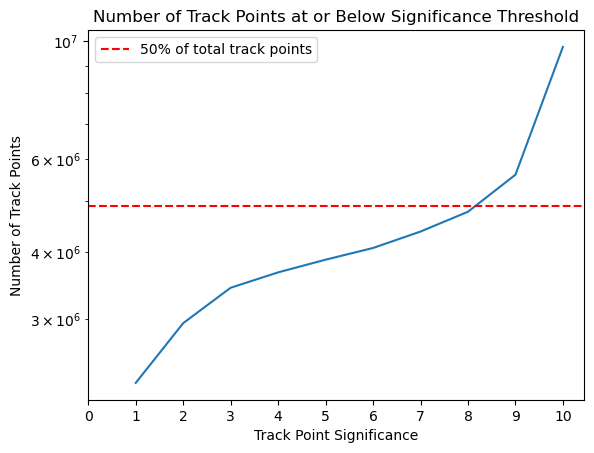

In [20]:
fig = plt.figure()
plt.semilogy(significances, lengths)
plt.axhline(y=halfway_line, color='r', linestyle='--', label='50% of total track points')
plt.title('Number of Track Points at or Below Significance Threshold')
plt.xlabel('Track Point Significance')
plt.ylabel('Number of Track Points')
plt.xticks(range(len(significances)+1), range(len(significances)+1))
plt.legend()

# Save the figure
fig.savefig('Significance.png', dpi=300, bbox_inches='tight')

plt.show()

* List of number of points and the significance cut-off
* Since we care about the flight descent, we will start with significance 5 to cut off a lot of data and hopefully still find the top of descent (TOD) event

In [21]:
print('\n'.join(f'{l} {s}' for l, s in zip(lengths, significances)))

2268585 1
2941138 2
3430268 3
3667116 4
3875091 5
4076989 6
4379065 7
4772023 8
5604937 9
9766293 10


# EDIT THIS TO CHOOSE WHAT DF TO SAVE

In [22]:
fil_iff_tr = sig_dfs[4]
print(len(fil_iff_tr))

3875091


# Making a Primary Key

In [23]:
fil_iff_tr.head(1)

,recTime,fltKey,bcnCode,AcId,coord1,coord2,alt,significance,coord1Accur,coord2Accur,groundSpeed,course,rateOfClimb,scratchPad,airportCode,trackNumber,modeSCode
0,1.641022e+09,119416,1027.0,SIA35,33.94005,-118.41064,1.06,1,0.1,0.1,9.0,348,0.0,unassigned,NaN,574.0,76cda2


In [24]:
fil_iff_hd.head(1)

,recTime,fltKey,bcnCode,source,AcId,acType,Orig,Dest,OpsType,estOrig,estDest,modeSCode,perfCat
2,1.641023e+09,119420,1071.0,LAX,ASA846,B738,NaN,LAX,A,NaN,LAX,a784d5,J


In [25]:
fil_iff_hd['fltKey'].value_counts()

38242    3
38597    3
37461    3
38171    3
37676    3
        ..
16197    1
16187    1
16186    1
16181    1
39922    1
Name: fltKey, Length: 7171, dtype: int64

In [26]:
fil_iff_hd['AcId'].value_counts()

ASA866     13
NKS1349    12
AAL880     12
HAL4       12
ANA6       12
           ..
SKW4711     1
AAL2778     1
LXJ437      1
DAL1088     1
TFF909      1
Name: AcId, Length: 2503, dtype: int64

In [27]:
fil_iff_hd['modeSCode'].value_counts()

a651e1    24
a64e2a    18
a675a9    18
a66a84    16
a65d06    16
          ..
a7e8bf     1
a9979f     1
a7811e     1
a06539     1
a678cf     1
Name: modeSCode, Length: 3634, dtype: int64

In [28]:
fil_iff_tr.head(1)

,recTime,fltKey,bcnCode,AcId,coord1,coord2,alt,significance,coord1Accur,coord2Accur,groundSpeed,course,rateOfClimb,scratchPad,airportCode,trackNumber,modeSCode
0,1.641022e+09,119416,1027.0,SIA35,33.94005,-118.41064,1.06,1,0.1,0.1,9.0,348,0.0,unassigned,NaN,574.0,76cda2


In [29]:
fil_iff_hd.head(1)

,recTime,fltKey,bcnCode,source,AcId,acType,Orig,Dest,OpsType,estOrig,estDest,modeSCode,perfCat
2,1.641023e+09,119420,1071.0,LAX,ASA846,B738,NaN,LAX,A,NaN,LAX,a784d5,J


In [30]:
fil_iff_tr['valid'] = pd.to_datetime(fil_iff_tr['recTime'], unit='s').dt.strftime('%m/%d/%Y')
fil_iff_hd['valid'] = pd.to_datetime(fil_iff_hd['recTime'], unit='s').dt.strftime('%m/%d/%Y')

/var/folders/62/f84_mp192073x9pd72l46fth0000gn/T/ipykernel_2479/1900738632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_iff_hd['valid'] = pd.to_datetime(fil_iff_hd['recTime'], unit='s').dt.strftime('%m/%d/%Y')


In [31]:
fil_iff_tr.head(1)

,recTime,fltKey,bcnCode,AcId,coord1,coord2,alt,significance,coord1Accur,coord2Accur,groundSpeed,course,rateOfClimb,scratchPad,airportCode,trackNumber,modeSCode,valid
0,1.641022e+09,119416,1027.0,SIA35,33.94005,-118.41064,1.06,1,0.1,0.1,9.0,348,0.0,unassigned,NaN,574.0,76cda2,01/01/2022


In [32]:
fil_iff_hd.head(1)

,recTime,fltKey,bcnCode,source,AcId,acType,Orig,Dest,OpsType,estOrig,estDest,modeSCode,perfCat,valid
2,1.641023e+09,119420,1071.0,LAX,ASA846,B738,NaN,LAX,A,NaN,LAX,a784d5,J,01/01/2022


In [33]:
fil_iff_tr['pKey_fltAcMode'] = (fil_iff_tr['fltKey'].astype(str) + '_' + 
                                fil_iff_tr['AcId'].astype(str) + '_' + 
                                fil_iff_tr['modeSCode'].astype(str))

fil_iff_hd['pKey_fltAcMode'] = (fil_iff_hd['fltKey'].astype(str) + '_' + 
                                fil_iff_hd['AcId'].astype(str) + '_' + 
                                fil_iff_hd['modeSCode'].astype(str))

/var/folders/62/f84_mp192073x9pd72l46fth0000gn/T/ipykernel_2479/3312847396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_iff_hd['pKey_fltAcMode'] = (fil_iff_hd['fltKey'].astype(str) + '_' +


In [34]:
fil_iff_tr['mergeKey'] = fil_iff_tr['fltKey'].map(str) + '_' + fil_iff_tr['valid'].map(str)
fil_iff_hd['mergeKey'] = fil_iff_hd['fltKey'].map(str) + '_' + fil_iff_hd['valid'].map(str)

/var/folders/62/f84_mp192073x9pd72l46fth0000gn/T/ipykernel_2479/7796608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_iff_hd['mergeKey'] = fil_iff_hd['fltKey'].map(str) + '_' + fil_iff_hd['valid'].map(str)


In [35]:
fil_iff_tr['mergeKey'].isnull().any()

False

In [36]:
fil_iff_hd['mergeKey'].isnull().any()

False

In [37]:
fil_iff_tr.head(1)

,recTime,fltKey,bcnCode,AcId,coord1,coord2,alt,significance,coord1Accur,coord2Accur,groundSpeed,course,rateOfClimb,scratchPad,airportCode,trackNumber,modeSCode,valid,pKey_fltAcMode,mergeKey
0,1.641022e+09,119416,1027.0,SIA35,33.94005,-118.41064,1.06,1,0.1,0.1,9.0,348,0.0,unassigned,NaN,574.0,76cda2,01/01/2022,119416_SIA35_76cda2,119416_01/01/2022


In [38]:
fil_iff_hd.head(1)

,recTime,fltKey,bcnCode,source,AcId,acType,Orig,Dest,OpsType,estOrig,estDest,modeSCode,perfCat,valid,pKey_fltAcMode,mergeKey
2,1.641023e+09,119420,1071.0,LAX,ASA846,B738,NaN,LAX,A,NaN,LAX,a784d5,J,01/01/2022,119420_ASA846_a784d5,119420_01/01/2022


# Checking value counts for our primary keys

In [39]:
fil_iff_tr['pKey_fltAcMode'].value_counts()

85516_M54_a80360       2855
16148_M20_a7eabd       1972
15882_PD18_a8b939      1809
50636_PD3_a1e5b3       1717
60709_SH21_ad535a      1474
                       ... 
45668_1201_a2afe1         1
88048_VOI899_a46368       1
37745_DAL368_aa600a       1
37714_UNKN_a8ce8c         1
42550_N1421G_abbcc1       1
Name: pKey_fltAcMode, Length: 21463, dtype: int64

In [40]:
fil_iff_hd['pKey_fltAcMode'].value_counts()

119420_ASA846_a784d5    1
36288_SKW5854_a7f096    1
36340_SKW5835_a7dbaa    1
36332_SWA2212_aab09a    1
36322_DAL2362_a403b3    1
                       ..
16442_UAL1789_a620b7    1
16440_SKW6240_a65d06    1
16438_UAL1093_a3c3e0    1
16437_AAL171_a03235     1
39922_PAC964_aa8499     1
Name: pKey_fltAcMode, Length: 7624, dtype: int64

# Should be okay, no header has more than one occurence

In [41]:
iff_master = fil_iff_hd[['fltKey', 'AcId', 'acType', 'Orig', 'Dest', 'perfCat', 
                         'pKey_fltAcMode']].merge(fil_iff_tr[['coord1', 'coord2', 'alt',
                            'significance', 'coord1Accur', 'coord2Accur', 'groundSpeed', 'course', 
                            'rateOfClimb', 'scratchPad', 'airportCode', 'trackNumber', 'recTime',
                            'pKey_fltAcMode', 'mergeKey']], on='pKey_fltAcMode')
print(iff_master.shape)

(1618440, 21)


In [42]:
iff_master.head(1)

,fltKey,AcId,acType,Orig,Dest,perfCat,pKey_fltAcMode,coord1,coord2,alt,...,coord1Accur,coord2Accur,groundSpeed,course,rateOfClimb,scratchPad,airportCode,trackNumber,recTime,mergeKey
0,119420,ASA846,B738,NaN,LAX,J,119420_ASA846_a784d5,33.93549,-118.5447,21.69,...,0.5,0.5,184.0,82,-1500.0,unassigned,LAX,4031.0,1.641023e+09,119420_01/01/2022


In [43]:
# print(fil_iff_hd['modeSCode'].nunique(), iff_master['modeSCode'].nunique())
# print(list(set(fil_iff_hd['modeSCode'].unique().tolist()) - set(iff_master['modeSCode'].unique().tolist())))

In [47]:
iff_master['mergeKey'].isnull().any()

False

In [44]:
iff_master.head()

,fltKey,AcId,acType,Orig,Dest,perfCat,pKey_fltAcMode,coord1,coord2,alt,...,coord1Accur,coord2Accur,groundSpeed,course,rateOfClimb,scratchPad,airportCode,trackNumber,recTime,mergeKey
0,119420,ASA846,B738,NaN,LAX,J,119420_ASA846_a784d5,33.93549,-118.54470,21.69,...,0.5,0.5,184.0,82,-1500.0,unassigned,LAX,4031.0,1.641023e+09,119420_01/01/2022
1,119420,ASA846,B738,NaN,LAX,J,119420_ASA846_a784d5,33.93710,-118.52927,18.81,...,0.5,0.5,175.0,83,-1500.0,unassigned,LAX,4031.0,1.641023e+09,119420_01/01/2022
2,119420,ASA846,B738,NaN,LAX,J,119420_ASA846_a784d5,33.93859,-118.51472,16.56,...,0.5,0.5,164.0,83,-1140.0,unassigned,LAX,4031.0,1.641023e+09,119420_01/01/2022
3,119420,ASA846,B738,NaN,LAX,J,119420_ASA846_a784d5,33.94002,-118.50101,14.06,...,0.5,0.5,157.0,85,-780.0,unassigned,LAX,4031.0,1.641023e+09,119420_01/01/2022
4,119420,ASA846,B738,NaN,LAX,J,119420_ASA846_a784d5,33.94139,-118.48753,12.13,...,0.5,0.5,155.0,83,-360.0,unassigned,LAX,4031.0,1.641023e+09,119420_01/01/2022


* Splitting df to equal sized chunks to then read in easier

In [48]:
length = len(iff_master)
chunk_size = length//10
df_list = [iff_master[i:i+chunk_size] for i in range(0, length, chunk_size)]
for idx, df in enumerate(df_list):
    df.to_csv(f'Sherlock_data/chunked_IFF/IFF{idx}.csv')

In [46]:
iff_master.to_csv('Sherlock_data/IFF.csv', index=False)